# Лабораторная работа №5
## Вариант 2
### Задание 15

$$
\begin{cases}
\frac{\partial u}{\partial t} - (x + e^{-t}) \frac{\partial u}{\partial x} = x(x + e^{-t}), \; 0<t \leq 1, \; 
0 < x \leq 1\\
u(x, 0) = - \frac{x^2}{2} + x, \; \; u(1, t) = e^{t} + t - 0.5
\end{cases}
$$

Разностная схема

$$
\begin{cases}
u_l^{n+1} = u_l^n - \frac{\tau}{2h}(x_l + e^{-t^n} + \frac{\tau_n}{2}x_l)(u_{l+2}^n-4u^n_{l+1}+3u_{l}^n) 
+ \frac{ \tau^2}{2h^2}(x_l + e^{-t^n})(u_{l+2}^n -2u_{l+1}^n +u_{l}^n) 
+ \tau_n (x_l(x_l + e^{-t^n}) +\frac{\tau_n}{2}(2x_l^2 +2x_le^{-t^n} + e^{-2t^n}) ), \\
l = \overline{0, L-2}, \;
n = \overline{0, N-1} \\
u_l^0 = -0.5x_l^2 + x_l, \; l = \overline{0, L}, \; u_L^n=e^{t^n} + t^n - 0.5, \; n = \overline{1, N} \\
u_{L-1}^n = ? 
\end{cases}
$$

Аналитическое решение:
$$
U = xe^{t} + t - x^2/2
$$

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


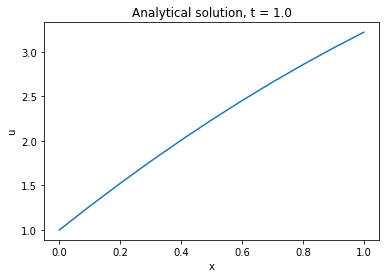

,0,1,2,3,4,5,6,7,8,9,10
x,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
y,1.00000E+00,1.26683E+00,1.52366E+00,1.77048E+00,2.00731E+00,2.23414E+00,2.45097E+00,2.65780E+00,2.85463E+00,3.04145E+00,3.21828E+00


In [3]:
x = np.linspace(0, 1, 11)
t = 1

u_a = x*np.exp(t) + t - x**2/2
plt.title('Analytical solution, t = 1.0')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x, u_a)
plt.show()

pd.options.display.float_format = '{:.5E}'.format
df =pd.DataFrame({"x": x, "y": u_a})
df.T

Из аппроксимации внутренних точек получаем, что:
$$
\Vert \delta f^{(h)} \Vert \leq O(\tau^2)+ O(h^2)
$$
Т.е. имеем второй порядок аппроксимации

Нам нужно условие $[u]_{L-1}^n$ со вторым порядком по h
$$[u]_{L-1}^n = [u]_L^n - [u'_x]_L^n h  + O(h^2)$$
$$[u]_{L-1}^n = [u]_L^n $$
$$[u'_x]_{L}^n =\frac{[u_t]_L^n}{e^{-t^n} + x_L} - x_L $$
$$[u]_{L-1}^n = e^{t^n} + t^n - 0.5 - h(e^{t^n} - 1)$$

In [4]:
def analyt(x,t):
    return  x*np.exp(t) + t - x**2/2

In [5]:
def U_analyt(N, L, x, t):   
    t_a = []
    for i in range(N+1):
        for j in range(L+1):
            t_a.append(t[i])
    t_a = np.array(t_a)

    x_a = np.array([])
    for i in range(N+1):
        x_a = np.concatenate((x_a,x))

    U_an = np.vectorize(analyt)(x_a,t_a).reshape((N+1,L+1))   

    return U_an

In [6]:
def U_num(N, L, x, t):
    
    h = 1/L
    tau = 1/N
    a_x = -(x)
    a_t =  - np.exp(-t)
    psi = np.exp(t) + t - 0.5
    psi_der1 = np.exp(t) + 1

    b_x = x
    b_t = np.exp(-t)
    phi = -x**2/2 + x
    
    u_der1 =  1/(a_x[L] + a_t) * (-psi_der1 + b_x[L]*(b_x[L] + b_t))
#     u_der2 = 1/a**2 * (psi_der2 + a)
#     u_der3 = -1/a**3 * psi_der3

    
    U = np.zeros((N+1,L+1))
    U[0] = phi
    U.reshape((1,(N+1)*(L+1)))[0][L::L+1] = psi

#     h_arr = [h*i for i in range(0,3)]
#     for j in range(1,3):
#         k = L-j
    for i in range(1,N+1):

        U[i][L-1] = U[i][L] - u_der1[i] * h 


    for n in range(N):
        for l in range(L-1):
            U[n+1][l] = U[n][l] - tau/(2*h)*(x[l] + np.exp(-t[n]) + tau*x[l]/2)*(U[n][l+2] - 4*U[n][l+1] + 3*U[n][l]) + (tau**2)/(2*h**2)*((x[l] +np.exp(-t[n]))**2 )*(U[n][l+2] -2*U[n][l+1] +U[n][l] ) + (tau)*((x[l] +np.exp(-t[n]))*x[l] +tau/2*(2*x[l]**2 + 2*x[l]*np.exp(-t[n]) +np.exp(-2*t[n]) ))

    return U

In [7]:
def result(L, N): 
    
    h = 1/L
    tau = 1/N
    

    x = np.arange(0,1+1/(100*L),1/L)
    t = np.arange(0,1+1/(100*N),1/N)
    #a = -(x + np.exp(-t))
    pd.set_option('display.float_format', lambda x: '{:.6E}'.format(x))
    
    value = abs(U_analyt(N,L, x, t)[N]-U_num(N,L,x,t)[N])
    data = np.concatenate((x,U_analyt(N,L,x,t)[N],U_num(N,L,x,t)[N], value, [ max(value) for i in range(L+1) ]))
    data = data.reshape((5,L+1))
    table = pd.DataFrame(data.T, columns = ['x', 'Analitic', 'Numeric', 'Diff', 'Max Diff'])
    
    plt.figure(figsize = (10,6))
    plt.plot(x,np.vectorize(analyt)(x,[t[N] for i in range(L+1)]))
    plt.plot(x,U_num(N,L,x,t)[N])
    plt.legend(['analitic','numeric'])
    plt.show()
    print('Max diff = {:.5E}'.format(max(value)))
    
    return table

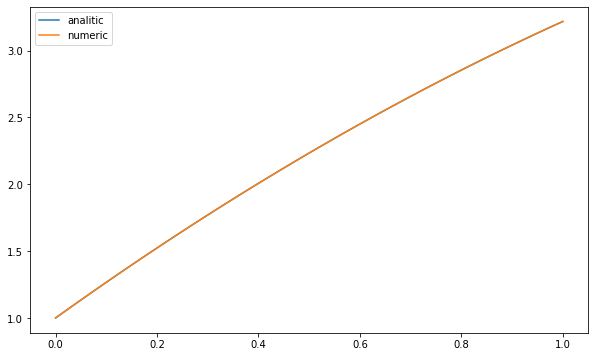

Max diff = 7.81250E-05


,x,Analitic,Numeric,Diff,Max Diff
0,0.000000E+00,1.000000E+00,1.000014E+00,1.365552E-05,7.812500E-05
1,1.250000E-02,1.033900E+00,1.033922E+00,2.209993E-05,7.812500E-05
2,2.500000E-02,1.067645E+00,1.067671E+00,2.609909E-05,7.812500E-05
3,3.750000E-02,1.101232E+00,1.101260E+00,2.760426E-05,7.812500E-05
4,5.000000E-02,1.134664E+00,1.134692E+00,2.816437E-05,7.812500E-05
...,...,...,...,...,...
76,9.500000E-01,3.131118E+00,3.131180E+00,6.234009E-05,7.812500E-05
77,9.625000E-01,3.153143E+00,3.153207E+00,6.367587E-05,7.812500E-05
78,9.750000E-01,3.175012E+00,3.175074E+00,6.130831E-05,7.812500E-05
79,9.875000E-01,3.196725E+00,3.196803E+00,7.812500E-05,7.812500E-05


In [8]:
result(80, 80)

#### Часть 2: Апроксимация

Проверим схему на апроксимацию увеличивая шаг по x и по t в два раза. Найдем ошибку как норму (здесь берем первую) разности численного решения и аналитического, затем построим график $\log(err)$ от $\log(h+\tau)$ и убедимся, что его коэффицент наклона не меньше 2 в идеале

In [9]:
def result_double_grid(num): 
    pd.set_option('display.float_format', lambda x: '{:.5E}'.format(x))
    L = np.array([10*2**i for i in range(num+1)])

    N = L
    h = 1/L
    tau = 1/N
    diff = []
    tau_plus_h = []
    for i in range(num+1):
        x = np.arange(0,1+1/(100*L[i]),1/L[i])
        t = np.arange(0,1+1/(100*N[i]),1/N[i])
        tau_plus_h.append(1/(L[i]-1)+1/(N[i]-1))
        diff.append(max(abs(U_analyt(N[i],L[i], x, t)[N[i]]-U_num(N[i],L[i],x,t)[N[i]])))
    data = np.concatenate((L, diff,tau_plus_h ))
    data = data.reshape((3,num+1))
    table = pd.DataFrame(data.T, columns = ['L', 'Max Diff', '$O(\tau) O(h)$'])
    
    
    return table

In [10]:
a = result_double_grid(7)
a

,L,Max Diff,$O(\tau) O(h)$
0,1.00000E+01,5.00000E-03,2.22222E-01
1,2.00000E+01,1.25000E-03,1.05263E-01
2,4.00000E+01,3.12500E-04,5.12821E-02
3,8.00000E+01,7.81250E-05,2.53165E-02
4,1.60000E+02,1.95312E-05,1.25786E-02
5,3.20000E+02,4.88281E-06,6.26959E-03
6,6.40000E+02,1.22070E-06,3.12989E-03
7,1.28000E+03,3.05176E-07,1.56372E-03


In [11]:
y = np.log(a['Max Diff'])
x = np.log(a['$O(\tau) O(h)$'])

In [12]:
z = np.polyfit(x, y, deg=1)

In [13]:
z

array([ 1.96420365, -2.27454675])

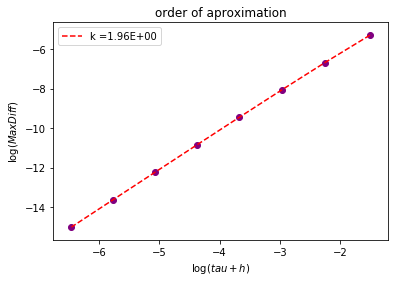

In [14]:
plt.title('order of aproximation')
plt.plot(x , y, label='k ={:.2E}'.format(z[0]), 
        linestyle='--', color='r')
plt.scatter(x , y, color = 'purple')
plt.xlabel('$\log(tau+h)$')
plt.ylabel('$\log(Max Diff)$')
plt.legend()
plt.show()


Итак, мы получили что конкретно в нашей задаче происходит апроксимация чуть ли не2-ого порядка, что совпадает с расчетами $O(h^2+\tau^2)$. 

#### Часть 3: устойчивость
За счет спектрального признака с использованием принципа замороженных коэффициентов, получили:
$$\tau < \frac{2h}{max(a)} --> \tau < h$$

In [15]:
error = []
k_list = np.linspace(0.3, 2.0, 25)

for k in k_list:
    L = 200+1
    N = int(200/k)+1
    x = np.arange(0,1+1/(100*L),1/L)
    t = np.arange(0,1+1/(100*N),1/N)
    error.append(max(abs(U_analyt(N,L, x, t)[N]-U_num(N,L,x,t)[N])))

No handles with labels found to put in legend.


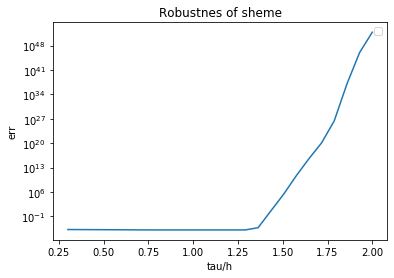

In [16]:
plt.title('Robustnes of sheme')
plt.yscale('log')
plt.xlabel('tau/h')
plt.ylabel('err')
# plt.fill_between([0.5, 1], 0, y2 = 1, color ='g', alpha = 0.3, label='robust area')
plt.plot(k_list, error)
plt.legend()
plt.show()